In [599]:
import sys 

sys.path.append("/home/davi/PycharmProjects/Reconhecimento-de-Padroes")

from numpy import linspace, random, array, concatenate, dot, mean, zeros, ones
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

test_size = .2

In [600]:
noise = random.rand(100)*4.0
x = linspace(0.1,50., 100)
alpha = random.uniform(0, 1)
b = random.uniform(-1,1)
y = (alpha*x + b) - noise

# plt.plot(x, y, 'r+')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

x = array(x, ndmin=2, dtype=float)
y = array(y, ndmin=2, dtype=float)

data = concatenate((x, y), axis=0).T
random.shuffle(data)

In [601]:
def train(x_train, y_train, form=None, max_iter=None, learning_rate=None):
    if form is None:
        return "Error"
    
    forms = {"normal equation": normal_equation,
             "gradient descent": gradient_descent,
             "kernnel": kernel}
    
    return forms[form](x_train, y_train, max_iter, learning_rate)

In [602]:
def normal_equation(x_train, y_train, max, learning_rate):

    pseudo_inverse = dot(inv(dot(x_train.T, x_train)), x_train.T)
    weights = dot(pseudo_inverse,y_train)
    
    return weights
    

In [603]:
def gradient_descent(x_train, y_train, max_iter, learning_rate):
    number_lines, number_columns = x_train.shape
    weights = zeros((number_columns, 1))
    print(max_iter)
    for epoch in range(max_iter):
        for point in range(number_lines):
            y_output = dot(x_train[point], weights)
            error = y_train[point] - y_output
            aux = array(learning_rate*(x_train[point]*error), ndmin=2)
            weights += aux.T
        
    return weights

In [604]:
def kernel():
    pass


In [605]:
def test(x_test, y_test, weights):
    
    number_examples = x_test.shape[0]
    output = dot(x_test, weights)
    error = sum((y_test-output)**2)*(1./(number_examples*1.0))
    
    return error



# Primeiro utilizado o modelo com a formula fechada

In [606]:
x = array(data[:, 0], ndmin=2).T
y = array(data[:, 1], ndmin=2).T

Media do erro:  3.8111843869993045


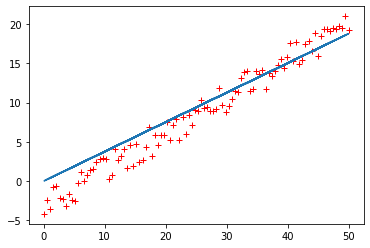

In [607]:
all_errors = []
for realization in range(10):
    
     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
     weights = train(x_train, y_train, form="normal equation")
     error = test(x_test, y_test, weights)
     all_errors.append(error)
     
print("Media do erro: ",mean(all_errors))

plt.plot(x, y, 'r+')
plt.plot(x, dot(x, weights))
plt.show()   
    
    

# Agora utilizando otimização com gradiente descendente


1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Media do erro:  2.6078850070638606


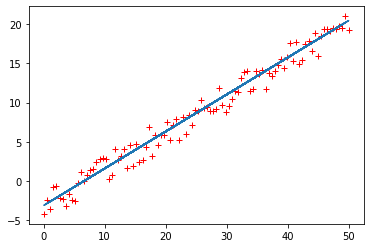

In [609]:
bias = ones((x.shape[0], 1))
x_new = concatenate((bias, x), axis=1)

for realization in range(10):
    
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=test_size)
    weights = train(x_train, y_train, max_iter=1000, learning_rate=1e-3, form="gradient descent")
    error = test(x_test, y_test, weights)
    all_errors.append(error)
     
print("Media do erro: ",mean(all_errors))

plt.plot(x, y, 'r+')
plt.plot(x, dot(x_new, weights))
plt.show()   
    

# Agora utilizando o metodo de regressão com kernel
